Epoch  10 | Loss: 1.1214
Epoch  20 | Loss: 0.2897
Epoch  30 | Loss: 0.1023
Epoch  40 | Loss: 0.0567
Epoch  50 | Loss: 0.0456
Epoch  60 | Loss: 0.0429
Epoch  70 | Loss: 0.0422
Epoch  80 | Loss: 0.0420
Epoch  90 | Loss: 0.0420
Epoch 100 | Loss: 0.0420


E:\Program\projects_python\DjangoProject\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Program\projects_python\DjangoProject\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31616 (\N{CJK UNIFIED IDEOGRAPH-7B80}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Program\projects_python\DjangoProject\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Program\projects_python\DjangoProject\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Program\projects_python\DjangoProject\.venv\Lib\site-packages\IPython\cor

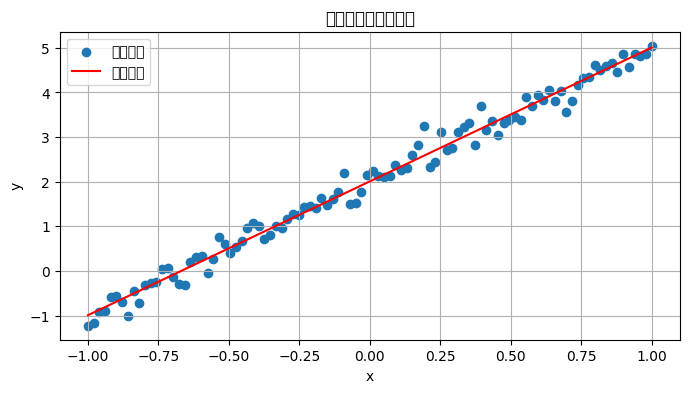


训练后模型参数：w = 2.997, b = 2.007


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# ====== 人工生成数据集 ======
torch.manual_seed(0)

# x 从 -1 到 1，共 100 个点
X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # shape: (100, 1)
y = 3 * X + 2 + 0.2 * torch.randn(X.size())            # y = 3x + 2 + 噪声

# ====== 线性模型定义 ======
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # y = wx + b

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

# ====== 训练准备 ======
criterion = nn.MSELoss()                    # 均方误差损失
optimizer = optim.SGD(model.parameters(), lr=0.1)

# ====== 训练过程 ======
for epoch in range(100):
    pred = model(X)
    loss = criterion(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1:3d} | Loss: {loss.item():.4f}")

# ====== 预测和可视化 ======
predicted = model(X).detach()

plt.figure(figsize=(8, 4))
plt.scatter(X.numpy(), y.numpy(), label="真实数据")
plt.plot(X.numpy(), predicted.numpy(), 'r-', label="模型预测")
plt.legend()
plt.title("最简单线性回归模型")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# 查看训练后的参数
w, b = model.linear.weight.item(), model.linear.bias.item()
print(f"\n训练后模型参数：w = {w:.3f}, b = {b:.3f}")


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 设置随机种子
torch.manual_seed(0)

# ====== 1. 生成多特征数据集 ======
num_samples = 200
num_features = 3

X = torch.randn(num_samples, num_features)  # (200, 3)
true_weights = torch.tensor([[1.5], [-2.0], [0.8]])  # (3, 1)
true_bias = 3.0
noise = 0.1 * torch.randn(num_samples, 1)

y = X @ true_weights + true_bias + noise  # 线性组合 + 噪声

# ====== 2. 定义多特征线性回归模型 ======
class LinearRegressionMulti(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionMulti(input_dim=num_features)

# ====== 3. 训练准备 ======
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# ====== 4. 模型训练 ======
epochs = 100
for epoch in range(epochs):
    pred = model(X)
    loss = criterion(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1:3d} | Loss: {loss.item():.4f}")

# ====== 5. 打印模型参数 ======
w = model.linear.weight.data
b = model.linear.bias.data
print(f"\n训练后权重：{w.numpy()}")
print(f"训练后偏置：{b.item():.4f}")


Epoch  10 | Loss: 0.2675
Epoch  20 | Loss: 0.0167
Epoch  30 | Loss: 0.0115
Epoch  40 | Loss: 0.0114
Epoch  50 | Loss: 0.0114
Epoch  60 | Loss: 0.0114
Epoch  70 | Loss: 0.0114
Epoch  80 | Loss: 0.0114
Epoch  90 | Loss: 0.0114
Epoch 100 | Loss: 0.0114

训练后权重：[[ 1.4937032 -2.0026433  0.7951423]]
训练后偏置：3.0004


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# 设置随机种子
torch.manual_seed(0)

# ====== 1. 生成数据 ======
num_samples = 200
num_features = 3

X = torch.randn(num_samples, num_features)
true_weights = torch.tensor([[1.5], [-2.0], [0.8]])
true_bias = 3.0
noise = 0.1 * torch.randn(num_samples, 1)

y = X @ true_weights + true_bias + noise

# 拆分训练集和验证集（80/20）
X_train, X_val, y_train, y_val = train_test_split(
    X.numpy(), y.numpy(), test_size=0.2, random_state=42
)

# 转回 tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val   = torch.tensor(X_val,   dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_val   = torch.tensor(y_val,   dtype=torch.float32)

# ====== 2. 定义模型 ======
class LinearRegressionMulti(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionMulti(input_dim=num_features)

# ====== 3. 训练准备 ======
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# ====== 4. 模型训练 ======
for epoch in range(100):
    model.train()
    pred = model(X_train)
    loss = criterion(pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1:3d} | Train Loss: {loss.item():.4f}")

# ====== 5. 验证集评估 ======
model.eval()
with torch.no_grad():
    val_pred = model(X_val).numpy()
    val_true = y_val.numpy()

mae = mean_absolute_error(val_true, val_pred)
r2 = r2_score(val_true, val_pred)
mse = np.mean((val_pred - val_true) ** 2)

print(f"\n验证集评估:")
print(f" - MAE: {mae:.4f}")
print(f" - MSE: {mse:.4f}")
print(f" - R² : {r2:.4f}")


Epoch  10 | Train Loss: 0.2680
Epoch  20 | Train Loss: 0.0177
Epoch  30 | Train Loss: 0.0120
Epoch  40 | Train Loss: 0.0118
Epoch  50 | Train Loss: 0.0118
Epoch  60 | Train Loss: 0.0118
Epoch  70 | Train Loss: 0.0118
Epoch  80 | Train Loss: 0.0118
Epoch  90 | Train Loss: 0.0118
Epoch 100 | Train Loss: 0.0118

验证集评估:
 - MAE: 0.0798
 - MSE: 0.0098
 - R² : 0.9988


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# ====== 1. 构造数据 ======
torch.manual_seed(0)

num_samples = 200
num_features = 3

X = torch.randn(num_samples, num_features)
true_weights = torch.tensor([[1.5], [-2.0], [0.8]])
true_bias = 3.0
noise = 0.1 * torch.randn(num_samples, 1)

y = X @ true_weights + true_bias + noise

# 拆分数据集
X_train, X_val, y_train, y_val = train_test_split(
    X.numpy(), y.numpy(), test_size=0.2, random_state=42
)

# 转成 tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

# ====== 2. 定义模型类 ======
class LinearRegressionMulti(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

# ====== 3. 训练函数封装 ======
def train_model(model, X_train, y_train, epochs=100, lr=0.1, verbose=True):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        pred = model(X_train)
        loss = criterion(pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if verbose and (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1:3d} | Train Loss: {loss.item():.4f}")

# ====== 4. 验证评估函数封装 ======
def evaluate_model(model, X_val, y_val):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_val).numpy()
        y_true = y_val.numpy()

    mae = mean_absolute_error(y_true, y_pred)
    mse = np.mean((y_true - y_pred) ** 2)
    r2 = r2_score(y_true, y_pred)

    print(f"\n验证集评估:")
    print(f" - MAE: {mae:.4f}")
    print(f" - MSE: {mse:.4f}")
    print(f" - R² : {r2:.4f}")
    return {"mae": mae, "mse": mse, "r2": r2}

# ====== 5. 使用封装好的函数进行训练和验证 ======
model = LinearRegressionMulti(input_dim=num_features)

train_model(model, X_train, y_train, epochs=100, lr=0.1)

evaluate_model(model, X_val, y_val)


Epoch  10 | Train Loss: 0.2680
Epoch  20 | Train Loss: 0.0177
Epoch  30 | Train Loss: 0.0120
Epoch  40 | Train Loss: 0.0118
Epoch  50 | Train Loss: 0.0118
Epoch  60 | Train Loss: 0.0118
Epoch  70 | Train Loss: 0.0118
Epoch  80 | Train Loss: 0.0118
Epoch  90 | Train Loss: 0.0118
Epoch 100 | Train Loss: 0.0118

验证集评估:
 - MAE: 0.0798
 - MSE: 0.0098
 - R² : 0.9988


{'mae': 0.07979495078325272,
 'mse': np.float32(0.00980359),
 'r2': 0.9988219738006592}

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# ========================
# 1. 数据构造
# ========================
torch.manual_seed(0)
np.random.seed(0)

num_samples = 200
num_features = 3

X = torch.randn(num_samples, num_features)
true_weights = torch.tensor([[1.5], [-2.0], [0.8]])
true_bias = 3.0
noise = 0.1 * torch.randn(num_samples, 1)

y = X @ true_weights + true_bias + noise

# 拆分训练/验证集
X_train, X_val, y_train, y_val = train_test_split(
    X.numpy(), y.numpy(), test_size=0.2, random_state=42
)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_val   = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_val   = torch.tensor(y_val, dtype=torch.float32)

# ========================
# 2. 可配置 DNN 模型定义
# ========================
class DNNRegressor(nn.Module):
    def __init__(self, input_dim, hidden_layers=[64, 32], activation=nn.ReLU):
        super().__init__()
        layers = []
        prev_dim = input_dim

        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(activation())  # 实例化激活函数
            prev_dim = hidden_dim

        layers.append(nn.Linear(prev_dim, 1))  # 输出层
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

# ========================
# 3. 封装训练函数
# ========================
def train_model(model, X_train, y_train, epochs=100, lr=0.01, verbose=True):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        pred = model(X_train)
        loss = criterion(pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if verbose and (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1:3d} | Train Loss: {loss.item():.4f}")

# ========================
# 4. 封装验证评估函数
# ========================
def evaluate_model(model, X_val, y_val):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_val).numpy()
        y_true = y_val.numpy()

    mae = mean_absolute_error(y_true, y_pred)
    mse = np.mean((y_true - y_pred) ** 2)
    r2 = r2_score(y_true, y_pred)

    print(f"\n验证集评估:")
    print(f" - MAE: {mae:.4f}")
    print(f" - MSE: {mse:.4f}")
    print(f" - R² : {r2:.4f}")
    return {"mae": mae, "mse": mse, "r2": r2}

# ========================
# 5. 使用示例
# ========================
# 定义模型结构：输入 3 特征，2 个隐藏层 [64, 32]
model = DNNRegressor(input_dim=num_features, hidden_layers=[64, 32], activation=nn.ReLU)

# 训练模型
train_model(model, X_train, y_train, epochs=200, lr=0.01)

# 验证模型性能
evaluate_model(model, X_val, y_val)


Epoch  10 | Train Loss: 8.2492
Epoch  20 | Train Loss: 2.4074
Epoch  30 | Train Loss: 1.1292
Epoch  40 | Train Loss: 0.7391
Epoch  50 | Train Loss: 0.5833
Epoch  60 | Train Loss: 0.4801
Epoch  70 | Train Loss: 0.3920
Epoch  80 | Train Loss: 0.3174
Epoch  90 | Train Loss: 0.2559
Epoch 100 | Train Loss: 0.2088
Epoch 110 | Train Loss: 0.1724
Epoch 120 | Train Loss: 0.1446
Epoch 130 | Train Loss: 0.1236
Epoch 140 | Train Loss: 0.1075
Epoch 150 | Train Loss: 0.0949
Epoch 160 | Train Loss: 0.0848
Epoch 170 | Train Loss: 0.0769
Epoch 180 | Train Loss: 0.0705
Epoch 190 | Train Loss: 0.0650
Epoch 200 | Train Loss: 0.0604

验证集评估:
 - MAE: 0.1745
 - MSE: 0.0588
 - R² : 0.9929


{'mae': 0.17446961998939514,
 'mse': np.float32(0.05876752),
 'r2': 0.9929381608963013}

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# ========== 数据构造 ==========
torch.manual_seed(0)
np.random.seed(0)

num_samples = 200
num_features = 3

X = torch.randn(num_samples, num_features)
true_weights = torch.tensor([[1.5], [-2.0], [0.8]])
true_bias = 3.0
noise = 0.1 * torch.randn(num_samples, 1)

y = X @ true_weights + true_bias + noise

X_train, X_val, y_train, y_val = train_test_split(
    X.numpy(), y.numpy(), test_size=0.2, random_state=42
)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_val   = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_val   = torch.tensor(y_val, dtype=torch.float32)

# ========== DNN 模型 ==========
class DNNRegressor(nn.Module):
    def __init__(self, input_dim, hidden_layers=[64, 32], activation=nn.ReLU):
        super().__init__()
        layers = []
        prev_dim = input_dim

        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(activation())
            prev_dim = hidden_dim

        layers.append(nn.Linear(prev_dim, 1))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

# ========== 训练函数 ==========
def train_model(model, X_train, y_train, epochs=100, lr=0.01, verbose=False):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        pred = model(X_train)
        loss = criterion(pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if verbose and (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1:3d} | Train Loss: {loss.item():.4f}")

# ========== 验证函数 ==========
def evaluate_model(model, X_val, y_val):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_val).numpy()
        y_true = y_val.numpy()

    mae = mean_absolute_error(y_true, y_pred)
    mse = np.mean((y_true - y_pred) ** 2)
    r2 = r2_score(y_true, y_pred)
    return {"mae": mae, "mse": mse, "r2": r2}

# ========== 多模型训练器 ==========
class ModelRunner:
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.results = []

    def run(self, configs, X_train, y_train, X_val, y_val, epochs=100):
        for idx, config in enumerate(configs):
            print(f"\n🚀 模型 {idx+1}/{len(configs)}: {config}")
            model = DNNRegressor(
                input_dim=self.input_dim,
                hidden_layers=config["hidden_layers"],
                activation=config.get("activation", nn.ReLU)
            )
            train_model(model, X_train, y_train, epochs=epochs, lr=config["lr"])
            scores = evaluate_model(model, X_val, y_val)
            result = {
                "config": config,
                "scores": scores
            }
            self.results.append(result)

    def summary(self, sort_by="r2"):
        print("\n📊 所有模型表现：")
        sorted_results = sorted(self.results, key=lambda r: r["scores"][sort_by], reverse=True)
        for i, res in enumerate(sorted_results):
            cfg = res["config"]
            sc = res["scores"]
            print(f"[{i+1}] R²={sc['r2']:.4f} | MAE={sc['mae']:.4f} | MSE={sc['mse']:.4f} | {cfg}")
        return sorted_results

# ========== 使用示例 ==========
runner = ModelRunner(input_dim=num_features)

param_grid = [
    {"hidden_layers": [64, 32],     "lr": 0.01},
    {"hidden_layers": [128, 64],    "lr": 0.01},
    {"hidden_layers": [64, 64, 32], "lr": 0.005},
    {"hidden_layers": [32],         "lr": 0.1},
    {"hidden_layers": [128],        "lr": 0.001},
]

runner.run(param_grid, X_train, y_train, X_val, y_val, epochs=200)

runner.summary()



🚀 模型 1/5: {'hidden_layers': [64, 32], 'lr': 0.01}

🚀 模型 2/5: {'hidden_layers': [128, 64], 'lr': 0.01}

🚀 模型 3/5: {'hidden_layers': [64, 64, 32], 'lr': 0.005}

🚀 模型 4/5: {'hidden_layers': [32], 'lr': 0.1}

🚀 模型 5/5: {'hidden_layers': [128], 'lr': 0.001}

📊 所有模型表现：
[1] R²=0.9967 | MAE=0.1275 | MSE=0.0278 | {'hidden_layers': [32], 'lr': 0.1}
[2] R²=0.9956 | MAE=0.1532 | MSE=0.0364 | {'hidden_layers': [128, 64], 'lr': 0.01}
[3] R²=0.9929 | MAE=0.1745 | MSE=0.0588 | {'hidden_layers': [64, 32], 'lr': 0.01}
[4] R²=0.9631 | MAE=0.3166 | MSE=0.3068 | {'hidden_layers': [64, 64, 32], 'lr': 0.005}
[5] R²=0.9554 | MAE=0.4913 | MSE=0.3708 | {'hidden_layers': [128], 'lr': 0.001}


[{'config': {'hidden_layers': [32], 'lr': 0.1},
  'scores': {'mae': 0.12751513719558716,
   'mse': np.float32(0.02783283),
   'r2': 0.9966554641723633}},
 {'config': {'hidden_layers': [128, 64], 'lr': 0.01},
  'scores': {'mae': 0.15321020781993866,
   'mse': np.float32(0.03640347),
   'r2': 0.9956255555152893}},
 {'config': {'hidden_layers': [64, 32], 'lr': 0.01},
  'scores': {'mae': 0.17446961998939514,
   'mse': np.float32(0.05876752),
   'r2': 0.9929381608963013}},
 {'config': {'hidden_layers': [64, 64, 32], 'lr': 0.005},
  'scores': {'mae': 0.31658315658569336,
   'mse': np.float32(0.30684143),
   'r2': 0.9631282091140747}},
 {'config': {'hidden_layers': [128], 'lr': 0.001},
  'scores': {'mae': 0.4913470149040222,
   'mse': np.float32(0.3708453),
   'r2': 0.9554371237754822}}]


🚀 模型 1/3: {'hidden_layers': [64, 32], 'lr': 0.01}

🚀 模型 2/3: {'hidden_layers': [128, 64], 'lr': 0.01}

🚀 模型 3/3: {'hidden_layers': [64, 64, 32], 'lr': 0.005}

📊 所有模型表现：
[1] R²=0.9956 | MAE=0.1532 | MSE=0.0364 | {'hidden_layers': [128, 64], 'lr': 0.01}
[2] R²=0.9929 | MAE=0.1745 | MSE=0.0588 | {'hidden_layers': [64, 32], 'lr': 0.01}
[3] R²=0.9631 | MAE=0.3166 | MSE=0.3068 | {'hidden_layers': [64, 64, 32], 'lr': 0.005}


C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_5500\408700049.py:126: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_5500\408700049.py:126: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_5500\408700049.py:126: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_5500\408700049.py:126: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_5500\408700049.py:126: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_55

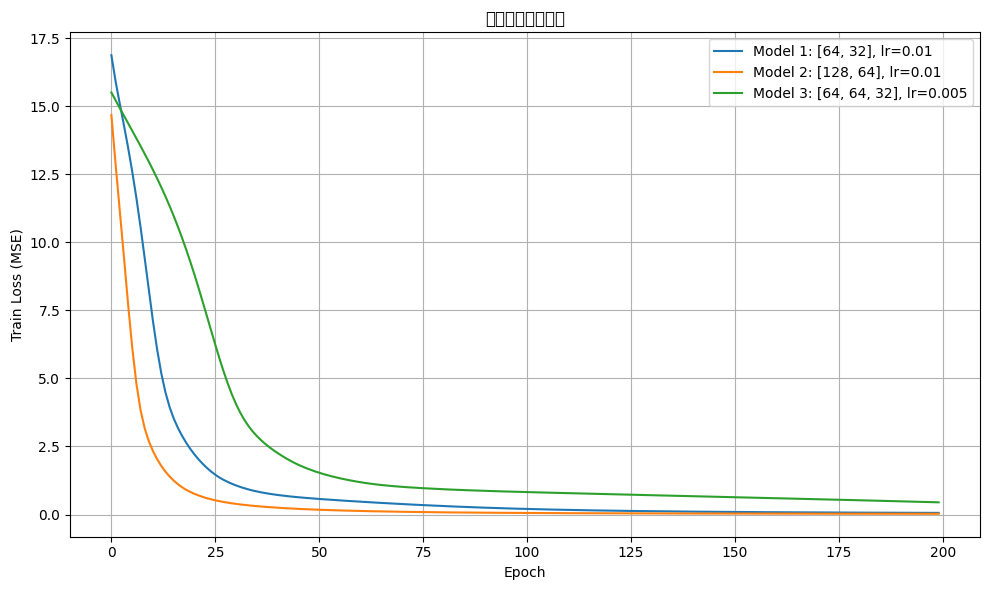

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ========== Step 1: 生成结构化数据 ==========
torch.manual_seed(0)
np.random.seed(0)

num_samples = 200
num_features = 3

X = torch.randn(num_samples, num_features)
true_weights = torch.tensor([[1.5], [-2.0], [0.8]])
true_bias = 3.0
noise = 0.1 * torch.randn(num_samples, 1)

y = X @ true_weights + true_bias + noise

X_train, X_val, y_train, y_val = train_test_split(
    X.numpy(), y.numpy(), test_size=0.2, random_state=42
)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_val   = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_val   = torch.tensor(y_val, dtype=torch.float32)

# ========== Step 2: 定义模型结构 ==========
class DNNRegressor(nn.Module):
    def __init__(self, input_dim, hidden_layers=[64, 32], activation=nn.ReLU):
        super().__init__()
        layers = []
        prev_dim = input_dim

        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(activation())
            prev_dim = hidden_dim

        layers.append(nn.Linear(prev_dim, 1))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

# ========== Step 3: 训练函数，记录 loss ==========
def train_model(model, X_train, y_train, epochs=100, lr=0.01, verbose=False):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    loss_history = []

    for epoch in range(epochs):
        model.train()
        pred = model(X_train)
        loss = criterion(pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_history.append(loss.item())

        if verbose and (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1:3d} | Train Loss: {loss.item():.4f}")

    return loss_history

# ========== Step 4: 验证指标函数 ==========
def evaluate_model(model, X_val, y_val):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_val).numpy()
        y_true = y_val.numpy()

    mae = mean_absolute_error(y_true, y_pred)
    mse = np.mean((y_true - y_pred) ** 2)
    r2 = r2_score(y_true, y_pred)
    return {"mae": mae, "mse": mse, "r2": r2}

# ========== Step 5: 多模型运行器 + loss 曲线绘图 ==========
class ModelRunner:
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.results = []

    def run(self, configs, X_train, y_train, X_val, y_val, epochs=100):
        for idx, config in enumerate(configs):
            print(f"\n🚀 模型 {idx+1}/{len(configs)}: {config}")
            model = DNNRegressor(
                input_dim=self.input_dim,
                hidden_layers=config["hidden_layers"],
                activation=config.get("activation", nn.ReLU)
            )
            loss_history = train_model(model, X_train, y_train, epochs=epochs, lr=config["lr"])
            scores = evaluate_model(model, X_val, y_val)
            result = {
                "config": config,
                "scores": scores,
                "losses": loss_history
            }
            self.results.append(result)

    def summary(self, sort_by="r2"):
        print("\n📊 所有模型表现：")
        sorted_results = sorted(self.results, key=lambda r: r["scores"][sort_by], reverse=True)
        for i, res in enumerate(sorted_results):
            cfg = res["config"]
            sc = res["scores"]
            print(f"[{i+1}] R²={sc['r2']:.4f} | MAE={sc['mae']:.4f} | MSE={sc['mse']:.4f} | {cfg}")
        return sorted_results

    def plot_losses(self):
        plt.figure(figsize=(10, 6))
        for i, result in enumerate(self.results):
            label = f"Model {i+1}: {result['config']['hidden_layers']}, lr={result['config']['lr']}"
            plt.plot(result["losses"], label=label)
        plt.xlabel("Epoch")
        plt.ylabel("Train Loss (MSE)")
        plt.title("训练损失曲线对比")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# ========== Step 6: 使用示例 ==========
if __name__ == "__main__":
    runner = ModelRunner(input_dim=num_features)

    param_grid = [
        {"hidden_layers": [64, 32],     "lr": 0.01},
        {"hidden_layers": [128, 64],    "lr": 0.01},
        {"hidden_layers": [64, 64, 32], "lr": 0.005},
    ]

    runner.run(param_grid, X_train, y_train, X_val, y_val, epochs=200)
    runner.summary()
    runner.plot_losses()



🚀 模型 1/3: {'hidden_layers': [64, 32], 'lr': 0.01}

🚀 模型 2/3: {'hidden_layers': [128, 64], 'lr': 0.01}

🚀 模型 3/3: {'hidden_layers': [64, 64, 32], 'lr': 0.005}

📊 所有模型表现：
[1] R²=0.9956 | MAE=0.1532 | MSE=0.0364 | {'hidden_layers': [128, 64], 'lr': 0.01}
[2] R²=0.9929 | MAE=0.1745 | MSE=0.0588 | {'hidden_layers': [64, 32], 'lr': 0.01}
[3] R²=0.9631 | MAE=0.3166 | MSE=0.3068 | {'hidden_layers': [64, 64, 32], 'lr': 0.005}


C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_5500\1930730069.py:134: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_5500\1930730069.py:134: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_5500\1930730069.py:134: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_5500\1930730069.py:134: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_5500\1930730069.py:134: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ShallowDreamer\AppData\Local\Temp\ipykern

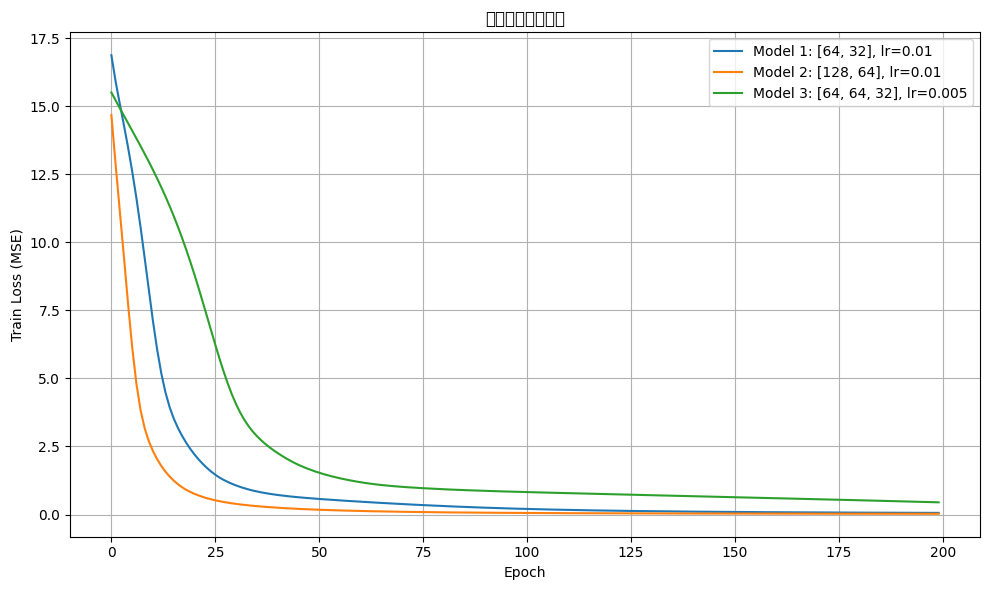

C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_5500\1930730069.py:147: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_5500\1930730069.py:147: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_5500\1930730069.py:147: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_5500\1930730069.py:147: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_5500\1930730069.py:147: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ShallowDreamer\AppData\Local\Temp\ipykern

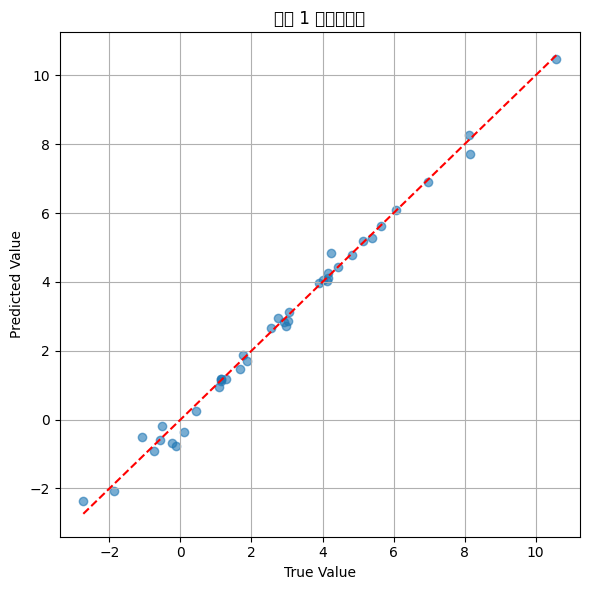

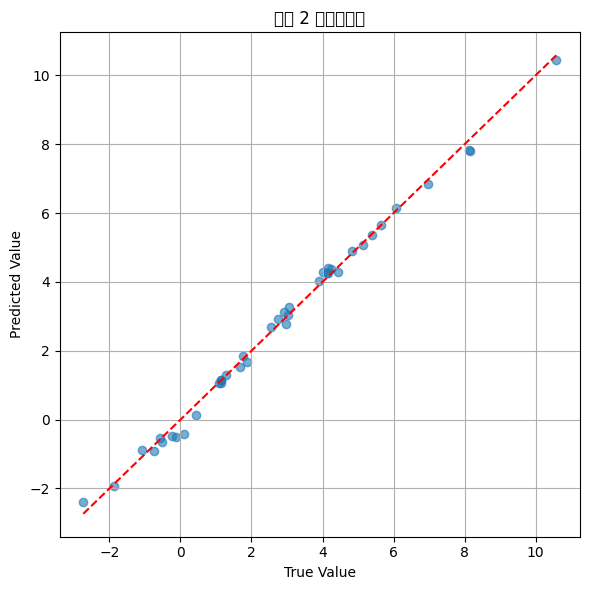

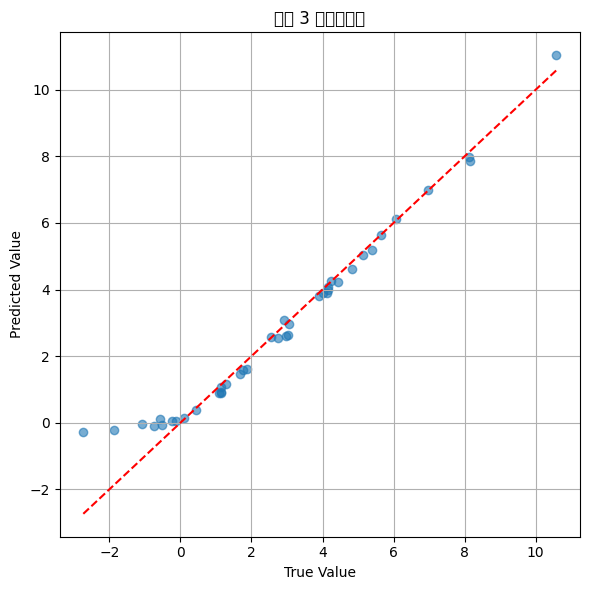

✅ 模型评估结果已保存至：results_step7.csv


In [11]:
# 1. 导入必要的库
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

# 2. 生成结构化数据
torch.manual_seed(0)
np.random.seed(0)

num_samples = 200
num_features = 3

X = torch.randn(num_samples, num_features)
true_weights = torch.tensor([[1.5], [-2.0], [0.8]])
true_bias = 3.0
noise = 0.1 * torch.randn(num_samples, 1)

y = X @ true_weights + true_bias + noise

# 划分训练集与验证集
X_train, X_val, y_train, y_val = train_test_split(
    X.numpy(), y.numpy(), test_size=0.2, random_state=42
)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

# 3. 定义DNN回归模型
class DNNRegressor(nn.Module):
    def __init__(self, input_dim, hidden_layers=[64, 32], activation=nn.ReLU):
        super().__init__()
        layers = []
        prev_dim = input_dim

        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(activation())
            prev_dim = hidden_dim

        layers.append(nn.Linear(prev_dim, 1))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

# 4. 定义训练函数
def train_model(model, X_train, y_train, epochs=100, lr=0.01, verbose=False):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    loss_history = []

    for epoch in range(epochs):
        model.train()
        pred = model(X_train)
        loss = criterion(pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_history.append(loss.item())

        if verbose and (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1:3d} | Train Loss: {loss.item():.4f}")

    return loss_history

# 5. 定义验证函数
def evaluate_model(model, X_val, y_val):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_val).numpy()
        y_true = y_val.numpy()

    mae = mean_absolute_error(y_true, y_pred)
    mse = np.mean((y_true - y_pred) ** 2)
    r2 = r2_score(y_true, y_pred)
    return {"mae": mae, "mse": mse, "r2": r2}

# 6. 定义多模型训练/评估/对比类
import pandas as pd

class ModelRunner:
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.results = []

    def run(self, configs, X_train, y_train, X_val, y_val, epochs=100):
        for idx, config in enumerate(configs):
            print(f"\n🚀 模型 {idx+1}/{len(configs)}: {config}")
            model = DNNRegressor(
                input_dim=self.input_dim,
                hidden_layers=config["hidden_layers"],
                activation=config.get("activation", nn.ReLU)
            )
            loss_history = train_model(model, X_train, y_train, epochs=epochs, lr=config["lr"])
            scores = evaluate_model(model, X_val, y_val)
            y_pred = model(X_val).detach().numpy()
            result = {
                "config": config,
                "scores": scores,
                "losses": loss_history,
                "y_true": y_val.numpy().flatten(),
                "y_pred": y_pred.flatten()
            }
            self.results.append(result)

    def summary(self, sort_by="r2"):
        print("\n📊 所有模型表现：")
        sorted_results = sorted(self.results, key=lambda r: r["scores"][sort_by], reverse=True)
        for i, res in enumerate(sorted_results):
            cfg = res["config"]
            sc = res["scores"]
            print(f"[{i+1}] R²={sc['r2']:.4f} | MAE={sc['mae']:.4f} | MSE={sc['mse']:.4f} | {cfg}")
        return sorted_results

    def plot_losses(self):
        plt.figure(figsize=(10, 6))
        for i, result in enumerate(self.results):
            label = f"Model {i+1}: {result['config']['hidden_layers']}, lr={result['config']['lr']}"
            plt.plot(result["losses"], label=label)
        plt.xlabel("Epoch")
        plt.ylabel("Train Loss (MSE)")
        plt.title("训练损失曲线对比")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def plot_predictions(self):
        for i, result in enumerate(self.results):
            plt.figure(figsize=(6, 6))
            plt.scatter(result["y_true"], result["y_pred"], alpha=0.6)
            plt.plot([min(result["y_true"]), max(result["y_true"])],
                     [min(result["y_true"]), max(result["y_true"])], 'r--')
            plt.xlabel("True Value")
            plt.ylabel("Predicted Value")
            plt.title(f"模型 {i+1} 预测对比图")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

    def export_results(self, filepath="model_results.csv"):
        records = []
        for i, res in enumerate(self.results):
            record = {
                "model_id": i + 1,
                "r2": res["scores"]["r2"],
                "mae": res["scores"]["mae"],
                "mse": res["scores"]["mse"],
                "hidden_layers": str(res["config"]["hidden_layers"]),
                "lr": res["config"]["lr"]
            }
            records.append(record)
        df = pd.DataFrame(records)
        df.to_csv(filepath, index=False)
        print(f"✅ 模型评估结果已保存至：{filepath}")


# 7. 模型运行示例
if __name__ == "__main__":
    runner = ModelRunner(input_dim=num_features)

    param_grid = [
        {"hidden_layers": [64, 32], "lr": 0.01},
        {"hidden_layers": [128, 64], "lr": 0.01},
        {"hidden_layers": [64, 64, 32], "lr": 0.005},
    ]

    runner.run(param_grid, X_train, y_train, X_val, y_val, epochs=200)
    runner.summary()
    runner.plot_losses()
    runner.plot_predictions()
    runner.export_results("results_step7.csv")



🚀 模型 1/3: {'hidden_layers': [64, 32], 'lr': 0.01}

🚀 模型 2/3: {'hidden_layers': [128, 64], 'lr': 0.01}

🚀 模型 3/3: {'hidden_layers': [64, 64, 32], 'lr': 0.005}

📊 所有模型表现：
[1] R²=0.9956 | MAE=0.1532 | MSE=0.0364 | {'hidden_layers': [128, 64], 'lr': 0.01}
[2] R²=0.9929 | MAE=0.1745 | MSE=0.0588 | {'hidden_layers': [64, 32], 'lr': 0.01}
[3] R²=0.9631 | MAE=0.3166 | MSE=0.3068 | {'hidden_layers': [64, 64, 32], 'lr': 0.005}


C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_44080\3993025341.py:133: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_44080\3993025341.py:133: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_44080\3993025341.py:133: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_44080\3993025341.py:133: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_44080\3993025341.py:133: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ShallowDreamer\AppData\Local\Temp\ip

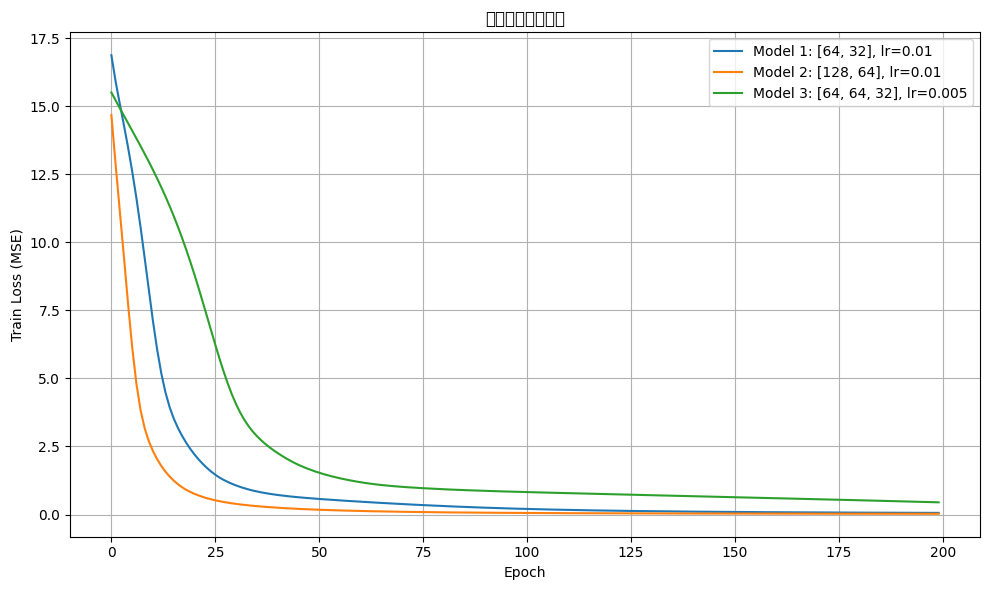

C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_44080\3993025341.py:146: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_44080\3993025341.py:146: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_44080\3993025341.py:146: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_44080\3993025341.py:146: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ShallowDreamer\AppData\Local\Temp\ipykernel_44080\3993025341.py:146: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ShallowDreamer\AppData\Local\Temp\ip

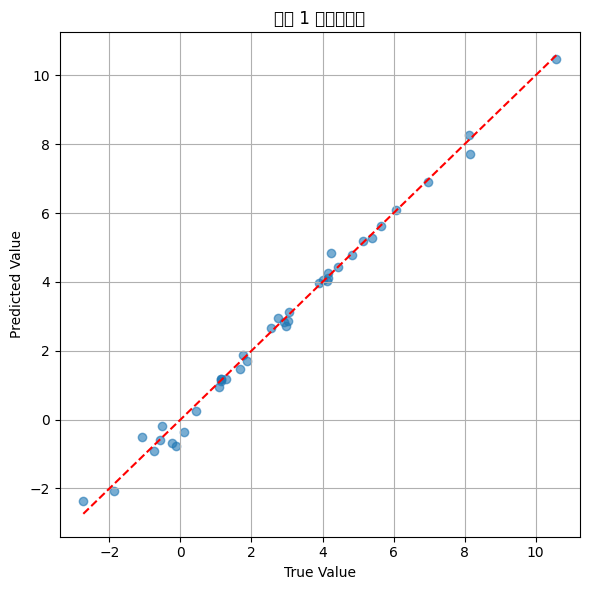

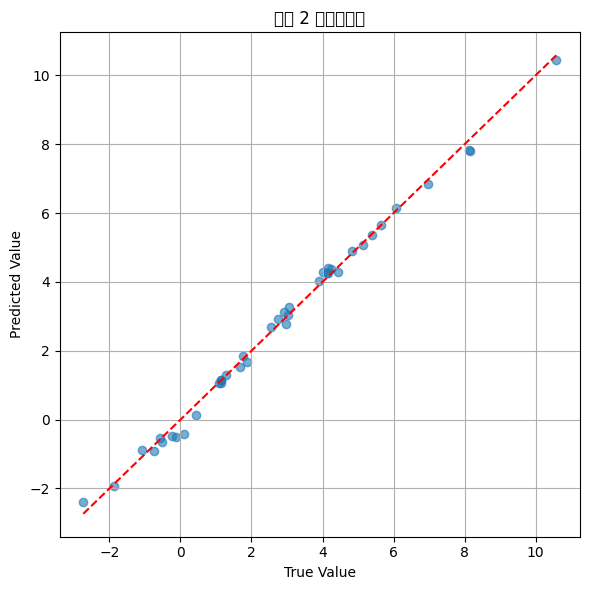

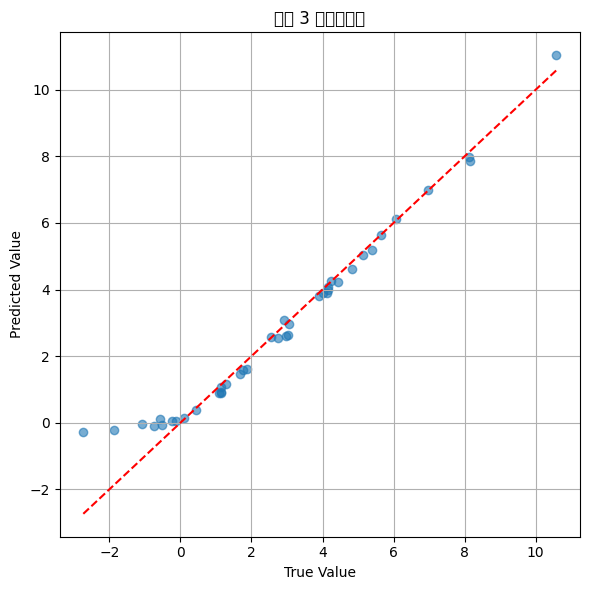

✅ 模型评估结果已保存至：results_step8.csv
✅ 模型已保存至 best_model.pth
✅ 模型已从 best_model.pth 加载
预测结果：
[[-0.7678866 ]
 [ 8.253247  ]
 [-0.17118865]
 [ 1.1735711 ]
 [ 2.7076857 ]]


In [3]:
# 1. 导入必要的库
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

# 2. 生成结构化数据
torch.manual_seed(0)
np.random.seed(0)

num_samples = 200
num_features = 3

X = torch.randn(num_samples, num_features)
true_weights = torch.tensor([[1.5], [-2.0], [0.8]])
true_bias = 3.0
noise = 0.1 * torch.randn(num_samples, 1)

y = X @ true_weights + true_bias + noise

# 划分训练集与验证集
X_train, X_val, y_train, y_val = train_test_split(
    X.numpy(), y.numpy(), test_size=0.2, random_state=42
)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

# 3. 定义DNN回归模型
class DNNRegressor(nn.Module):
    def __init__(self, input_dim, hidden_layers=[64, 32], activation=nn.ReLU):
        super().__init__()
        layers = []
        prev_dim = input_dim

        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(activation())
            prev_dim = hidden_dim

        layers.append(nn.Linear(prev_dim, 1))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

# 4. 定义训练函数
def train_model(model, X_train, y_train, epochs=100, lr=0.01, verbose=False):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    loss_history = []

    for epoch in range(epochs):
        model.train()
        pred = model(X_train)
        loss = criterion(pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_history.append(loss.item())

        if verbose and (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1:3d} | Train Loss: {loss.item():.4f}")

    return loss_history

# 5. 定义验证函数
def evaluate_model(model, X_val, y_val):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_val).numpy()
        y_true = y_val.numpy()

    mae = mean_absolute_error(y_true, y_pred)
    mse = np.mean((y_true - y_pred) ** 2)
    r2 = r2_score(y_true, y_pred)
    return {"mae": mae, "mse": mse, "r2": r2}

# 6. 定义多模型训练/评估/对比类
class ModelRunner:
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.results = []

    def run(self, configs, X_train, y_train, X_val, y_val, epochs=100):
        for idx, config in enumerate(configs):
            print(f"\n🚀 模型 {idx+1}/{len(configs)}: {config}")
            model = DNNRegressor(
                input_dim=self.input_dim,
                hidden_layers=config["hidden_layers"],
                activation=config.get("activation", nn.ReLU)
            )
            loss_history = train_model(model, X_train, y_train, epochs=epochs, lr=config["lr"])
            scores = evaluate_model(model, X_val, y_val)
            y_pred = model(X_val).detach().numpy()
            result = {
                "config": config,
                "scores": scores,
                "losses": loss_history,
                "y_true": y_val.numpy().flatten(),
                "y_pred": y_pred.flatten(),
                "model": model
            }
            self.results.append(result)

    def summary(self, sort_by="r2"):
        print("\n📊 所有模型表现：")
        sorted_results = sorted(self.results, key=lambda r: r["scores"][sort_by], reverse=True)
        for i, res in enumerate(sorted_results):
            cfg = res["config"]
            sc = res["scores"]
            print(f"[{i+1}] R²={sc['r2']:.4f} | MAE={sc['mae']:.4f} | MSE={sc['mse']:.4f} | {cfg}")
        return sorted_results

    def plot_losses(self):
        plt.figure(figsize=(10, 6))
        for i, result in enumerate(self.results):
            label = f"Model {i+1}: {result['config']['hidden_layers']}, lr={result['config']['lr']}"
            plt.plot(result["losses"], label=label)
        plt.xlabel("Epoch")
        plt.ylabel("Train Loss (MSE)")
        plt.title("训练损失曲线对比")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def plot_predictions(self):
        for i, result in enumerate(self.results):
            plt.figure(figsize=(6, 6))
            plt.scatter(result["y_true"], result["y_pred"], alpha=0.6)
            plt.plot([min(result["y_true"]), max(result["y_true"])],
                     [min(result["y_true"]), max(result["y_true"])], 'r--')
            plt.xlabel("True Value")
            plt.ylabel("Predicted Value")
            plt.title(f"模型 {i+1} 预测对比图")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

    def export_results(self, filepath="model_results.csv"):
        records = []
        for i, res in enumerate(self.results):
            record = {
                "model_id": i + 1,
                "r2": res["scores"]["r2"],
                "mae": res["scores"]["mae"],
                "mse": res["scores"]["mse"],
                "hidden_layers": str(res["config"]["hidden_layers"]),
                "lr": res["config"]["lr"]
            }
            records.append(record)
        df = pd.DataFrame(records)
        df.to_csv(filepath, index=False)
        print(f"✅ 模型评估结果已保存至：{filepath}")

    def save_model(self, model, filename="model.pth"):
        # 保存模型
        torch.save(model.state_dict(), filename)
        print(f"✅ 模型已保存至 {filename}")

    def load_model(self, model, filename="model.pth"):
        # 加载模型
        model.load_state_dict(torch.load(filename))
        model.eval()
        print(f"✅ 模型已从 {filename} 加载")
        return model

if __name__ == "__main__":
    runner = ModelRunner(input_dim=num_features)

    param_grid = [
        {"hidden_layers": [64, 32], "lr": 0.01},
        {"hidden_layers": [128, 64], "lr": 0.01},
        {"hidden_layers": [64, 64, 32], "lr": 0.005},
    ]

    runner.run(param_grid, X_train, y_train, X_val, y_val, epochs=200)
    runner.summary()
    runner.plot_losses()
    runner.plot_predictions()
    runner.export_results("results_step8.csv")

    # 保存第一个模型
    best_model = runner.results[0]["model"]
    runner.save_model(best_model, filename="best_model.pth")

    # 加载模型
    runner.load_model(best_model, filename="best_model.pth")

    # 使用加载的模型进行预测
    y_pred = best_model(X_val).detach().numpy()
    print(f"预测结果：\n{y_pred[:5]}")



In [16]:
# 1. 导入必要的库
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import uniform
import pandas as pd

# 2. 生成结构化数据
torch.manual_seed(0)
np.random.seed(0)

num_samples = 200
num_features = 3

X = torch.randn(num_samples, num_features)
true_weights = torch.tensor([[1.5], [-2.0], [0.8]])
true_bias = 3.0
noise = 0.1 * torch.randn(num_samples, 1)

y = X @ true_weights + true_bias + noise

# 划分训练集与验证集
X_train, X_val, y_train, y_val = train_test_split(
    X.numpy(), y.numpy(), test_size=0.2, random_state=42
)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

# 3. 定义DNN回归模型
class DNNRegressor(nn.Module):
    def __init__(self, input_dim, hidden_layers=[64, 32], activation=nn.ReLU):
        super().__init__()
        layers = []
        prev_dim = input_dim

        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(activation())
            prev_dim = hidden_dim

        layers.append(nn.Linear(prev_dim, 1))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

# 4. 定义训练函数
def train_model(model, X_train, y_train, epochs=100, lr=0.01, verbose=False):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    loss_history = []

    for epoch in range(epochs):
        model.train()
        pred = model(X_train)
        loss = criterion(pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_history.append(loss.item())

        if verbose and (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1:3d} | Train Loss: {loss.item():.4f}")

    return loss_history

# 5. 定义验证函数
def evaluate_model(model, X_val, y_val):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_val).numpy()
        y_true = y_val.numpy()

    mae = mean_absolute_error(y_true, y_pred)
    mse = np.mean((y_true - y_pred) ** 2)
    r2 = r2_score(y_true, y_pred)
    return {"mae": mae, "mse": mse, "r2": r2}

# 6. 自动调参 - 使用GridSearchCV
class PyTorchGridSearch:
    def __init__(self, model_class, param_grid, X_train, y_train, X_val, y_val, epochs=100):
        self.model_class = model_class
        self.param_grid = param_grid
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.epochs = epochs

    def fit(self):
        best_score = -np.inf
        best_params = None
        best_model = None
        best_loss_history = None

        for hidden_layers in self.param_grid["hidden_layers"]:
            for lr in self.param_grid["lr"]:
                print(f"\n🚀 Training with hidden_layers={hidden_layers} and lr={lr}")
                model = self.model_class(input_dim=self.X_train.shape[1], hidden_layers=hidden_layers)
                loss_history = train_model(model, self.X_train, self.y_train, epochs=self.epochs, lr=lr)
                scores = evaluate_model(model, self.X_val, self.y_val)

                if scores["r2"] > best_score:
                    best_score = scores["r2"]
                    best_params = {"hidden_layers": hidden_layers, "lr": lr}
                    best_model = model
                    best_loss_history = loss_history

        return best_model, best_params, best_score, best_loss_history

# 7. 自动调参 - 使用RandomizedSearchCV
class PyTorchRandomizedSearch:
    def __init__(self, model_class, param_dist, X_train, y_train, X_val, y_val, epochs=100):
        self.model_class = model_class
        self.param_dist = param_dist
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.epochs = epochs

    def fit(self, n_iter=10):
        best_score = -np.inf
        best_params = None
        best_model = None
        best_loss_history = None

        for _ in range(n_iter):
            hidden_layers = [np.random.choice(self.param_dist["hidden_layers"])]
            lr = np.random.choice(self.param_dist["lr"])
            print(f"\n🚀 Training with hidden_layers={hidden_layers} and lr={lr}")
            model = self.model_class(input_dim=self.X_train.shape[1], hidden_layers=hidden_layers)
            loss_history = train_model(model, self.X_train, self.y_train, epochs=self.epochs, lr=lr)
            scores = evaluate_model(model, self.X_val, self.y_val)

            if scores["r2"] > best_score:
                best_score = scores["r2"]
                best_params = {"hidden_layers": hidden_layers, "lr": lr}
                best_model = model
                best_loss_history = loss_history

        return best_model, best_params, best_score, best_loss_history

# 8. 设置超参数空间
param_grid = {
    "hidden_layers": [[64, 32], [128, 64], [64, 64, 32]],
    "lr": [0.01, 0.005, 0.001]
}

param_dist = {
    "hidden_layers": [[64, 32], [128, 64], [64, 64, 32]],
    "lr": uniform(0.001, 0.01)
}

# 9. 运行GridSearchCV
grid_search = PyTorchGridSearch(DNNRegressor, param_grid, X_train, y_train, X_val, y_val, epochs=200)
best_model_grid, best_params_grid, best_score_grid, best_loss_grid = grid_search.fit()

print(f"Best GridSearchCV model: {best_params_grid} | R²: {best_score_grid:.4f}")

# 10. 运行RandomizedSearchCV
random_search = PyTorchRandomizedSearch(DNNRegressor, param_dist, X_train, y_train, X_val, y_val, epochs=200)
best_model_random, best_params_random, best_score_random, best_loss_random = random_search.fit()

print(f"Best RandomizedSearchCV model: {best_params_random} | R²: {best_score_random:.4f}")

# 11. 可视化训练损失
plt.figure(figsize=(10, 6))
plt.plot(best_loss_grid, label=f"GridSearchCV Loss | R²={best_score_grid:.4f}")
plt.plot(best_loss_random, label=f"RandomizedSearchCV Loss | R²={best_score_random:.4f}")
plt.xlabel("Epoch")
plt.ylabel("Train Loss (MSE)")
plt.title("训练损失对比：GridSearchCV 与 RandomizedSearchCV")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 12. 可视化模型预测结果
y_pred_grid = best_model_grid(X_val).detach().numpy()
y_pred_random = best_model_random(X_val).detach().numpy()

plt.figure(figsize=(6, 6))
plt.scatter(y_val.numpy(), y_pred_grid, alpha=0.6, label="GridSearchCV")
plt.scatter(y_val.numpy(), y_pred_random, alpha=0.6, label="RandomizedSearchCV")
plt.plot([min(y_val.numpy()), max(y_val.numpy())],
         [min(y_val.numpy()), max(y_val.numpy())], 'r--')
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.title("预测对比：GridSearchCV 与 RandomizedSearchCV")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



🚀 Training with hidden_layers=[64, 32] and lr=0.01

🚀 Training with hidden_layers=[64, 32] and lr=0.005

🚀 Training with hidden_layers=[64, 32] and lr=0.001

🚀 Training with hidden_layers=[128, 64] and lr=0.01

🚀 Training with hidden_layers=[128, 64] and lr=0.005

🚀 Training with hidden_layers=[128, 64] and lr=0.001

🚀 Training with hidden_layers=[64, 64, 32] and lr=0.01

🚀 Training with hidden_layers=[64, 64, 32] and lr=0.005

🚀 Training with hidden_layers=[64, 64, 32] and lr=0.001
Best GridSearchCV model: {'hidden_layers': [128, 64], 'lr': 0.01} | R²: 0.9951


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.